In [15]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Open all dataset and merged
def concat_df(train_data, test_data):
	# Return a concatenated df of training and test set
	return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

In [17]:
#Correlation features
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


In [18]:
#Explore row and column numbers
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [19]:
#Recognize missing value in column
def display_missing(df):
	for col in df.columns.tolist():
		print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
	print('\n')

for df in dfs:
	print('{}'.format(df.name))
	display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




In [20]:
#Fill missing value of Age, Embarked and Fare
#Filling Age values
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
	for sex in ['female', 'male']:
		print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
	print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

#Filling Embarked values
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

#Filling Fare values
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of all passengers: 28.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of all passengers: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [21]:
# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

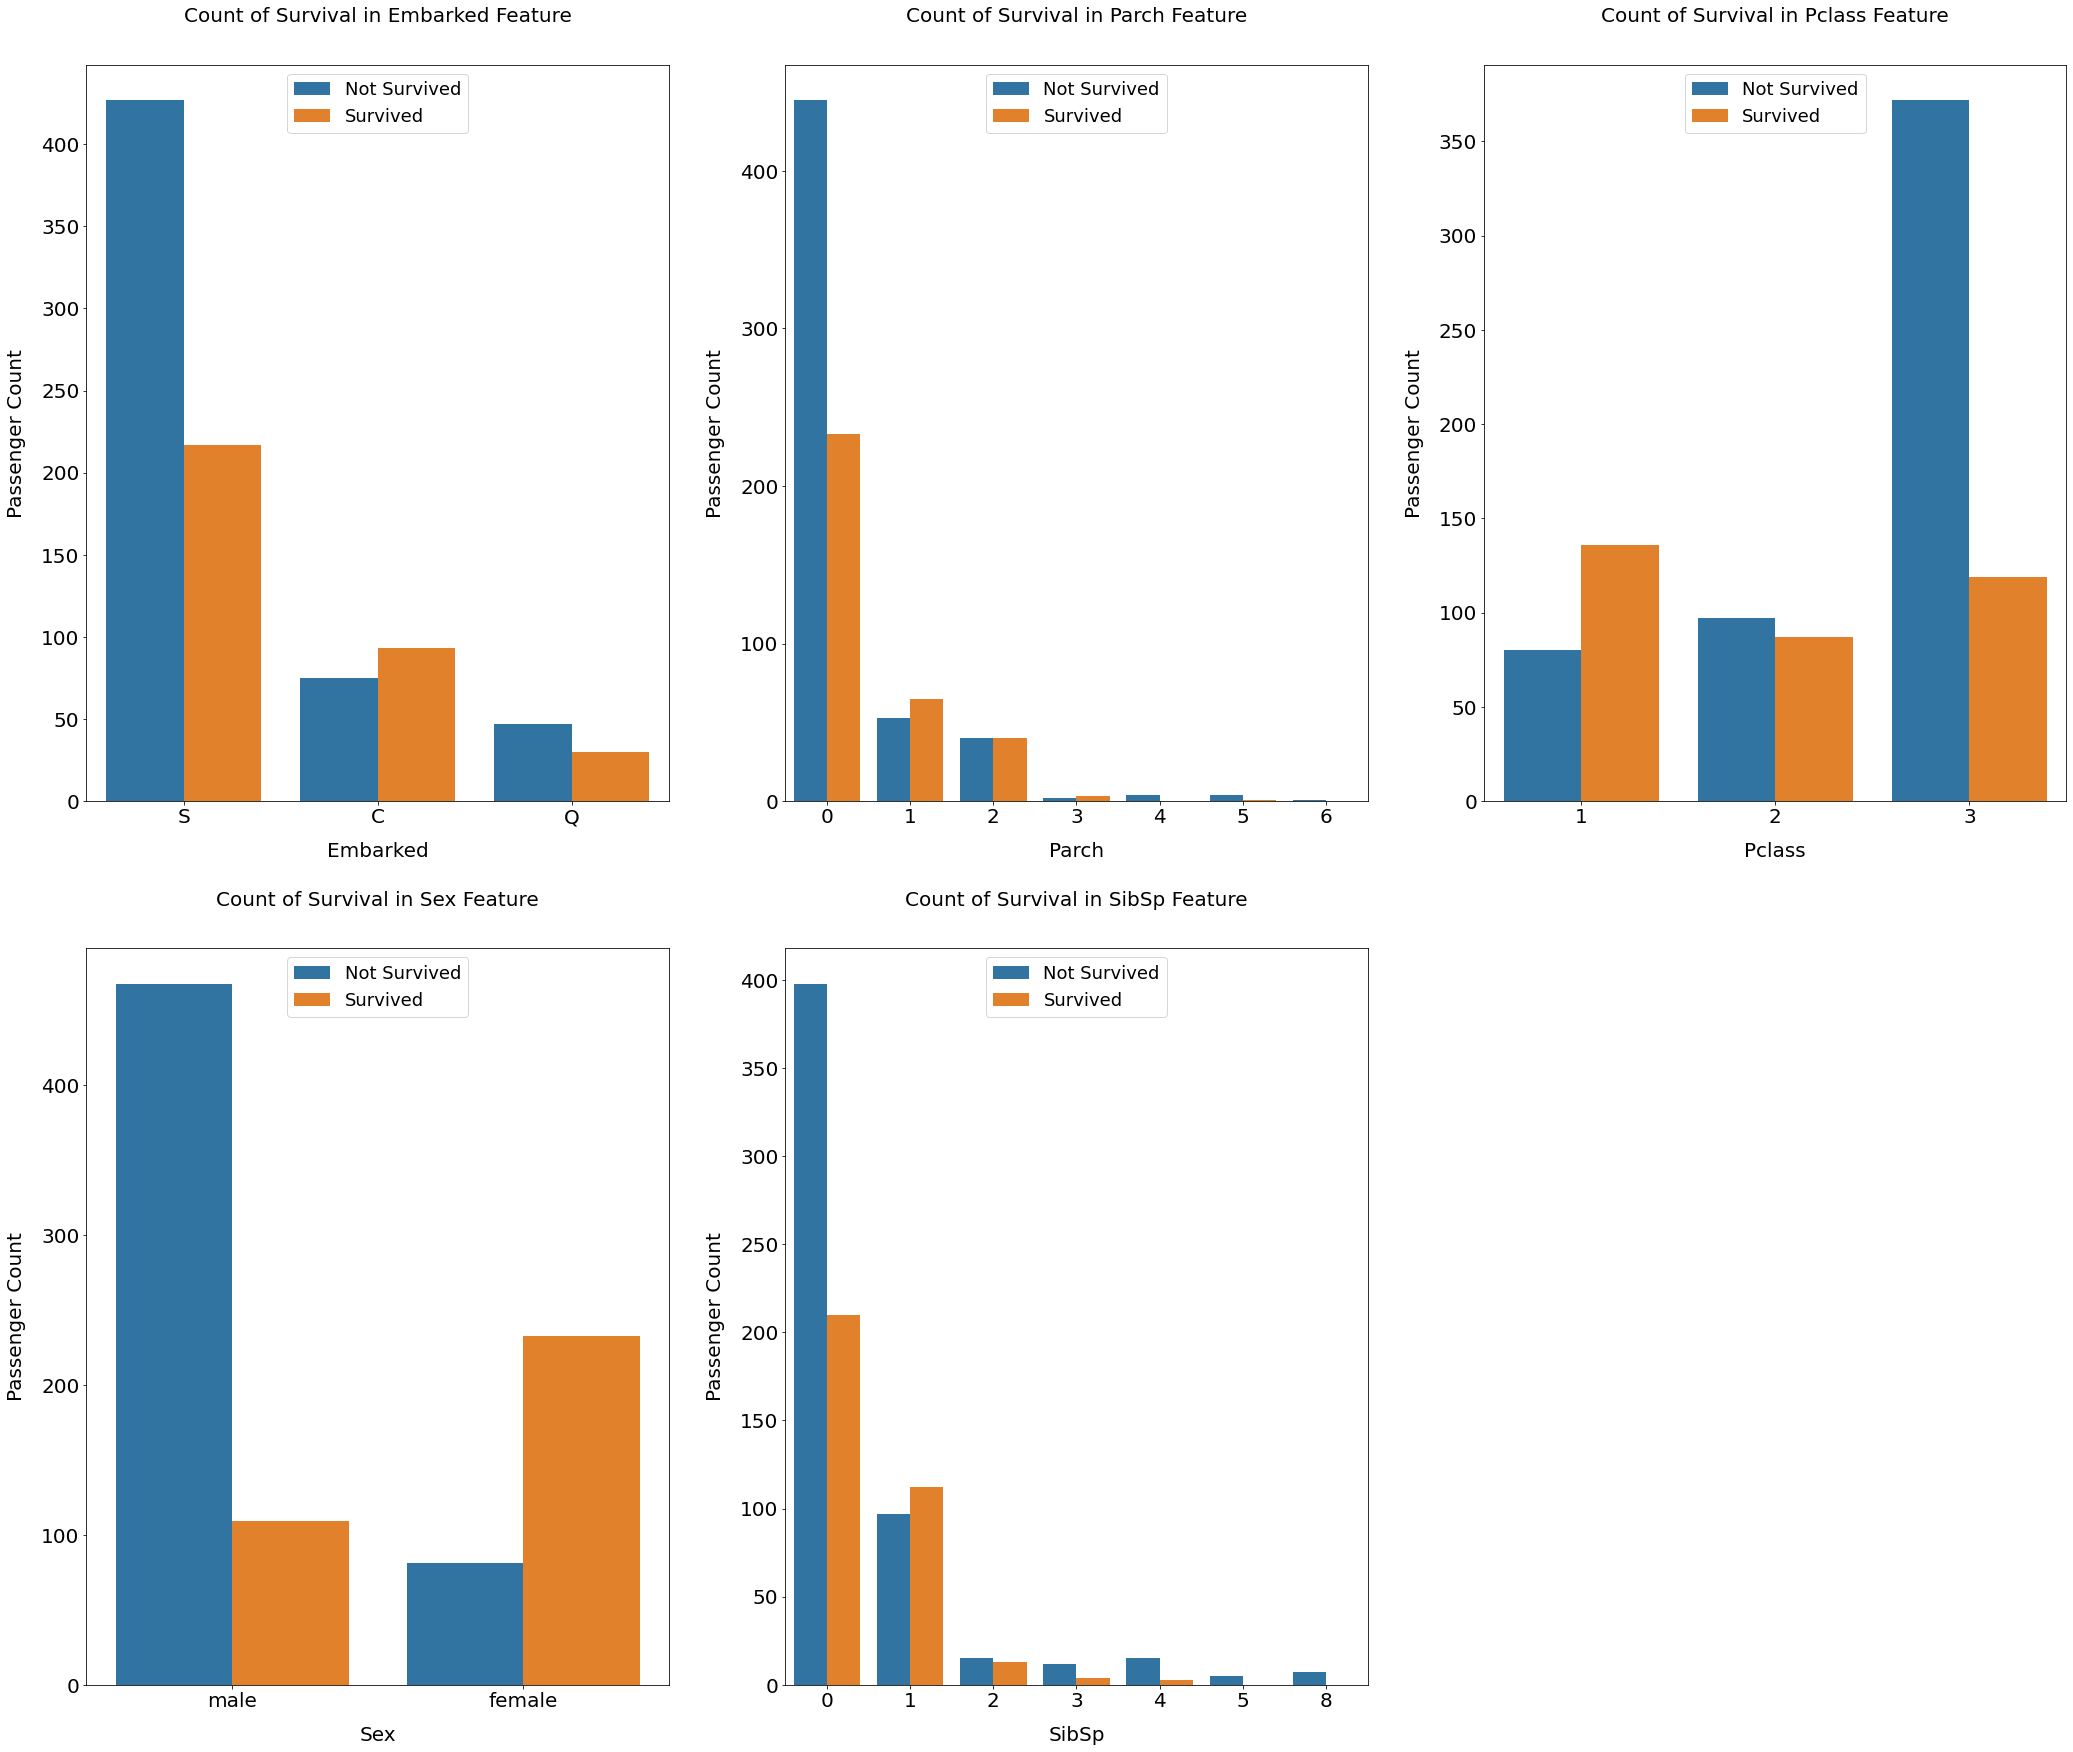

In [22]:
#Visualization Embarked, Parch, Pclass, Sex, SibSp with survived
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20 ,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
	plt.subplot(2, 3, i)
	sns.countplot(x=feature, hue='Survived', data=df_train)

	plt.xlabel('{}'.format(feature), size=20, labelpad=15)
	plt.ylabel('Passenger Count', size=20, labelpad=15)
	plt.tick_params(axis='x', labelsize=20)
	plt.tick_params(axis='y', labelsize=20)

	plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
	plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

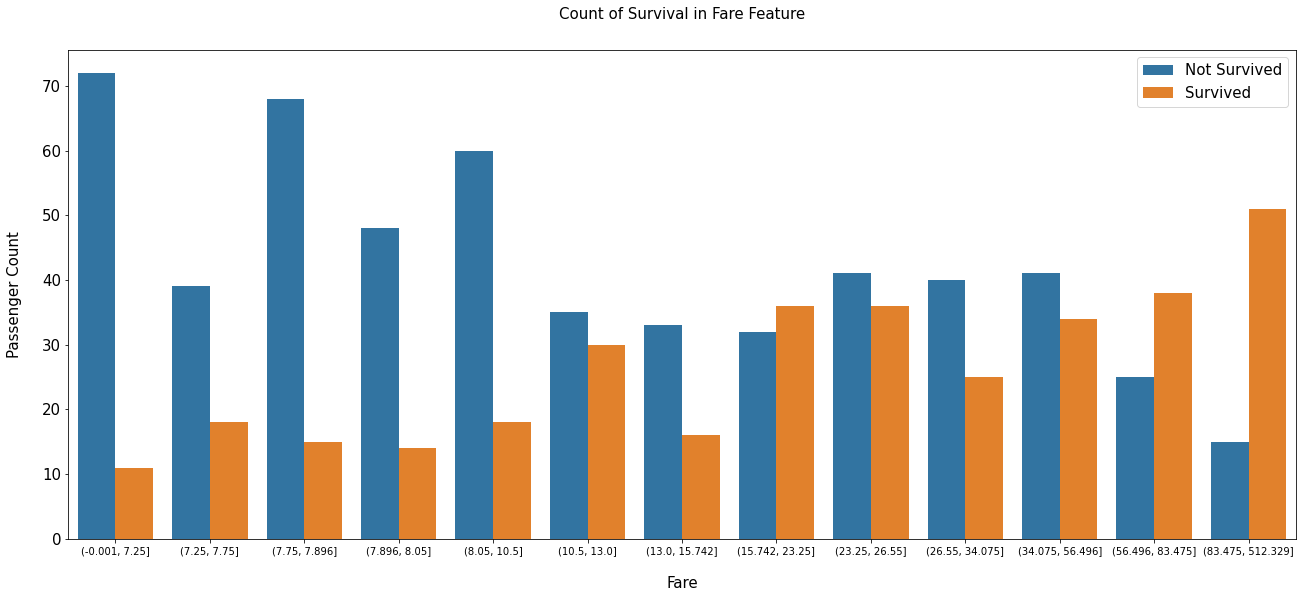

In [23]:
#Visualization Fare with survived
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [24]:
# Import scikit-learn library
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [25]:
#Add Family_Size column by merged of Parent, Children, Sibling and Spouse
"""
Categories of Family Size:
- Family Size 1 = Alone
- Family Size 2, 3 dan 4 = Small
- Family Size 5 dan 6 = Medium
- Family Size 7, 8 dan 11 = Large
"""
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

In [26]:
#Add Ticket_Frequency column by the same of passenger ticket
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

In [28]:
#Add Title column by splitting title on Name
df_all['Title'] = df_all['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

In [29]:
#Replace many various title to mostly title such Miss/Mrs/Ms and Dr/Millitary/Noble/Clergy
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [30]:
#Ungroup dataset to data_train and data_test
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

In [31]:
#Convert non-numeric to numeric categories
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
	for feature in non_numeric_features:
		df[feature] = LabelEncoder().fit_transform(df[feature])

cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
	for feature in cat_features:
		encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
		n = df[feature].nunique()
		cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
		encoded_df = pd.DataFrame(encoded_feat, columns=cols)
		encoded_df.index = df.index
		encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

Part of modelling without feature engineering is drop Family_Size_Grouped_1, Family_Size_Grouped_2, Family_Size_Grouped_3, Family_Size_Grouped_4 column.

In [34]:
#Drop unnecessary column (include feature engineering) and split dataset into training and test
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title', 'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4', 'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

#Split dataset and Standardize values
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

In [35]:
#Modelling with Random Forest Classifier and measuring accuration with cross_val_score
random_forest = RandomForestClassifier(criterion='gini',
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.85393258 0.7752809  0.87640449 0.85393258 0.80898876
 0.80898876 0.78651685 0.85393258 0.86516854]
Mean: 0.828314606741573
Standard Deviation: 0.03427537252123616


Part of modelling without feature engineering is add Family_Size_Grouped_1, Family_Size_Grouped_2, Family_Size_Grouped_3, Family_Size_Grouped_4 column.

In [36]:
#Drop unnecessary column 
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']
df_all.drop(columns=drop_cols, inplace=True)

In [37]:
#Split dataset and Standardize values
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

In [38]:
#Modelling with Random Forest Classifier and measuring accuration with cross_val_score
random_forest = RandomForestClassifier(criterion='gini',
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.83146067 0.78651685 0.86516854 0.85393258]
Mean: 0.8338951310861423
Standard Deviation: 0.03580698677842639
